# TITANIC SURVIVAL PREDICTION

### Data Collection Phase

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_data = pd.read_csv("titanic.csv")

In [3]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## DATA Analyze phase

<Axes: xlabel='Survived', ylabel='count'>

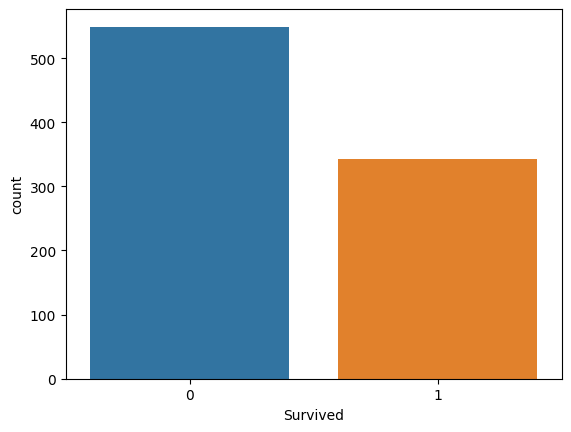

In [4]:
sns.countplot(x="Survived",data=titanic_data)


<Axes: xlabel='Sex', ylabel='count'>

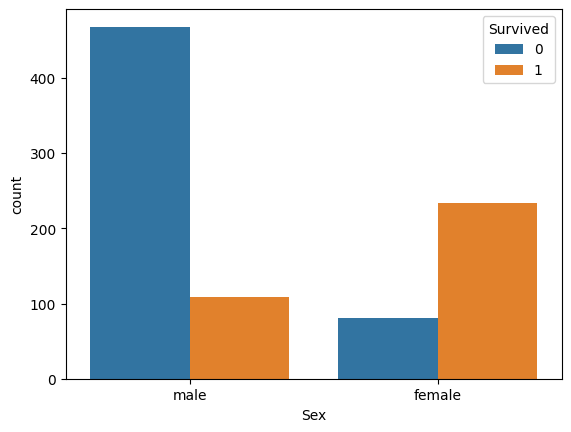

In [5]:
sns.countplot(x="Sex",hue="Survived",data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

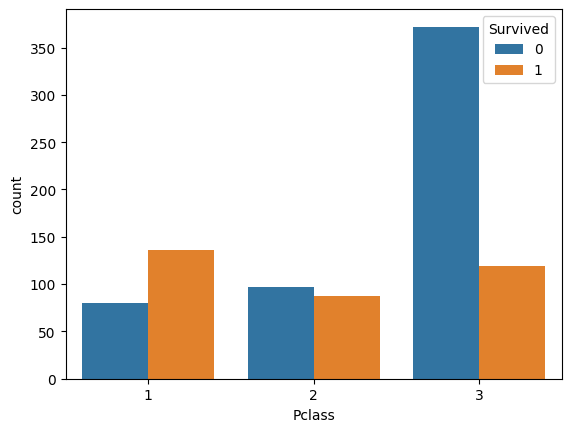

In [6]:
sns.countplot(x="Pclass",hue="Survived",data=titanic_data)

<Axes: ylabel='Frequency'>

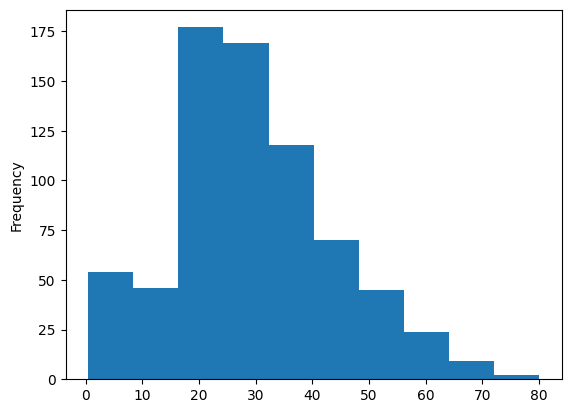

In [7]:
titanic_data["Age"].plot.hist()

<Axes: xlabel='SibSp', ylabel='count'>

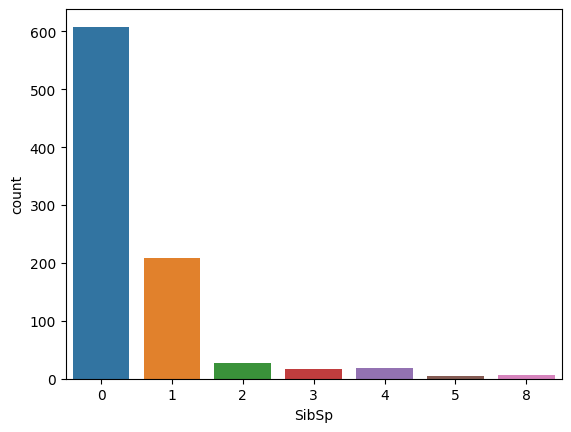

In [8]:
sns.countplot(x="SibSp",data=titanic_data)

# Data Cleaning / Wrangling Phase

In [9]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

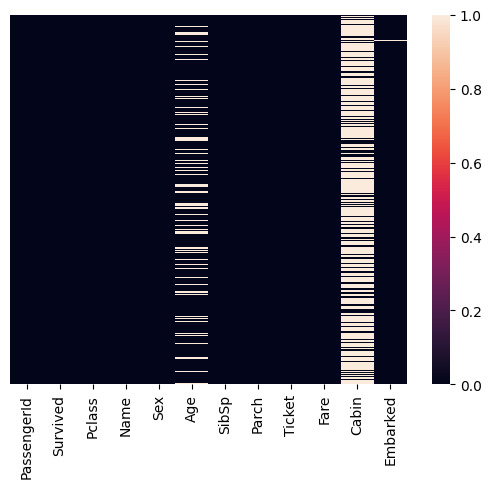

In [11]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

In [12]:
titanic_data.drop("Cabin",axis=1,inplace=True)

In [13]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

<Axes: >

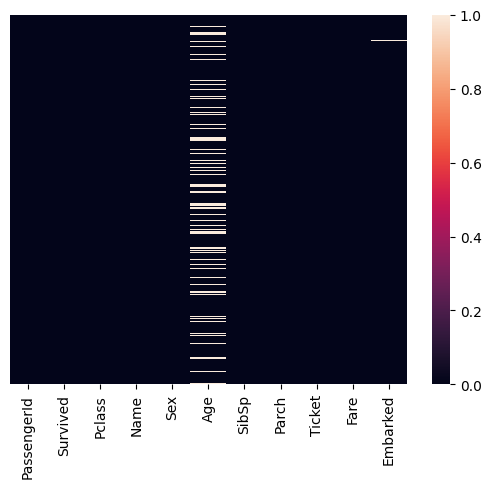

In [14]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

In [15]:
titanic_data.dropna(inplace=True)

In [16]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

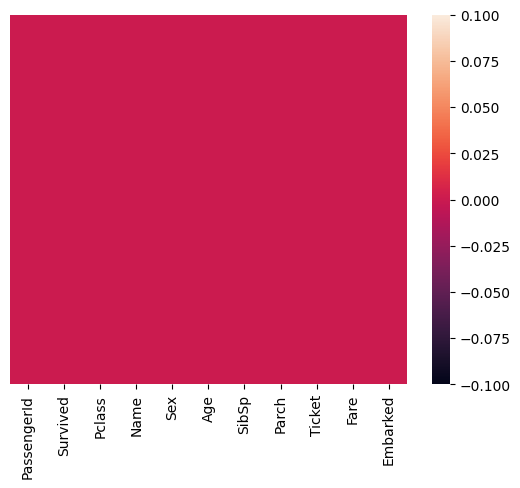

In [17]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

In [20]:
titanic_data['Sex']=titanic_data['Sex'].map({'male':1,'female':0})
titanic_data['Embarked']=titanic_data['Embarked'].map({'S':1,'C':0,'Q':2})

In [25]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1


In [26]:
titanic_data.drop(['PassengerId',"Name",'Ticket'],axis=1,inplace=True)

In [27]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [28]:
# titanic_data.drop(['Pclass'],axis=1,inplace=True)

# training phase

In [29]:
X = titanic_data.drop("Survived",axis=1)
y = titanic_data["Survived"]
X.columns = X.columns.astype(str)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression(max_iter=1000)

In [34]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [35]:
prediction = logmodel.predict(X_test)

# model performance

In [36]:
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.79      0.88      0.83       122\n           1       0.81      0.70      0.75        92\n\n    accuracy                           0.80       214\n   macro avg       0.80      0.79      0.79       214\nweighted avg       0.80      0.80      0.80       214\n'

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[107,  15],
       [ 28,  64]], dtype=int64)

# accuracy check

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.7990654205607477